In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_frame=pd.read_csv('deceased_data.csv')

In [5]:
data_frame.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15-Mar-20,2020-03-15,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16-Mar-20,2020-03-16,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17-Mar-20,2020-03-17,Deceased,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18-Mar-20,2020-03-18,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
data_frame.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
566,01-Oct-21,2021-10-01,Deceased,233,0,10,1,3,0,0,...,2,0,0,25,1,0,0,1,13,0
567,02-Oct-21,2021-10-02,Deceased,242,0,9,0,4,0,0,...,2,0,1,24,1,1,0,0,9,0
568,03-Oct-21,2021-10-03,Deceased,182,0,9,0,1,0,0,...,0,0,0,23,1,1,2,0,10,0
569,04-Oct-21,2021-10-04,Deceased,263,0,4,0,9,0,0,...,1,0,0,16,2,0,0,0,12,0
570,05-Oct-21,2021-10-05,Deceased,276,0,11,0,7,0,1,...,4,0,0,16,1,0,2,0,11,0


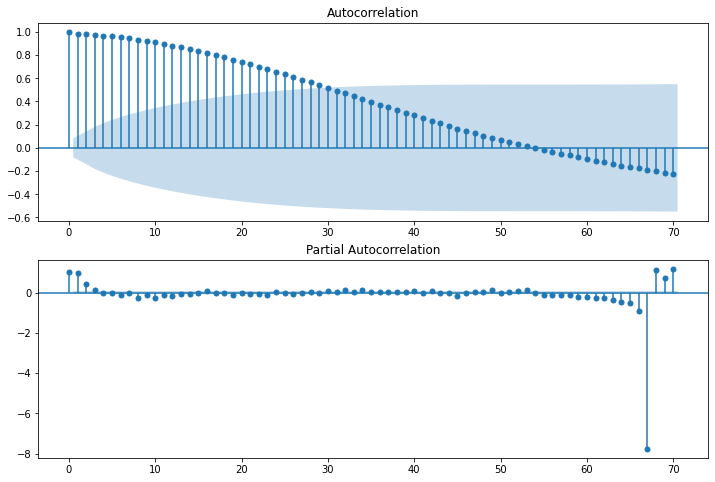

In [28]:
#acf and pacf plots for 'AP'
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
data=data_frame.copy()
data['AP']=data['AP'].shift(1)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['AP'].dropna(),lags=70,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['AP'].dropna(),lags=70,ax=ax2)

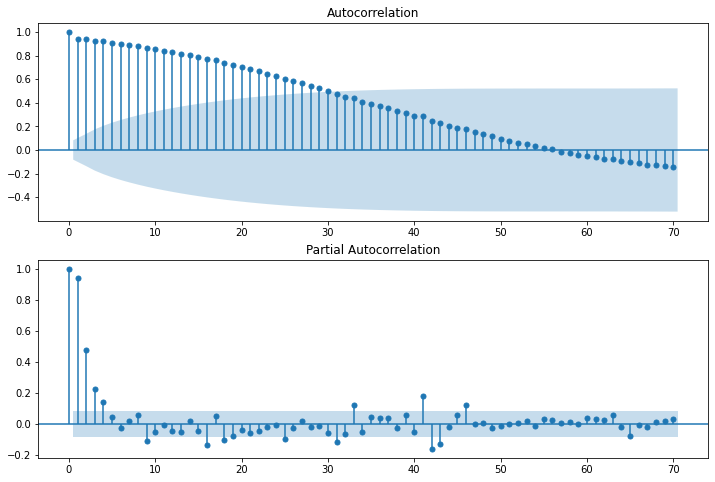

In [29]:
#acf and pacf plots for 'TT'
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
data=data_frame.copy()
data['TT']=data['TT'].shift(1)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['TT'].dropna(),lags=70,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['TT'].dropna(),lags=70,ax=ax2)

In [6]:
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_model(p,d,q,cols):
    data=data_frame.copy()
    ##sizes
    train_data_size=int(len(data)*(0.70))
    test_data_size=len(data)-train_data_size
    #
    last_index=data_frame.index[-1]
    #splitting the total cases data.
    train_data=data[cols][:train_data_size]
    test_data=data[cols][len(data)-test_data_size:]
    #initializing the model to train
    model=ARIMA(data_frame[cols],order=(p,d,q));
    #training the data and assigned to model_fit var.
    model_fit=model.fit()
    #predicting using test data
    data['Forecasted_data']=model_fit.predict(start=test_data.index[0],end=test_data.index[-1])
    #model evaluation
    #100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    print('p: {}, d: {}, q:{}'.format(p,d,q))
    print('Accuracy: {}%'.format(round(accuracy,2)))
    return model_fit

In [8]:
ap_model=ARIMA_model(52,2,66,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 52, d: 2, q:66
Accuracy: 84.76%


In [103]:
#SARIMAX 
import statsmodels.api as sm
def SARIMA_model(p,d,q,cols):
    data=data_frame.copy()
    ##sizes
    train_data_size=int(len(data)*(0.70))
    test_data_size=len(data)-train_data_size
    #
    last_index=data_frame.index[-1]
    #splitting the total cases data.
    train_data=data[cols][:train_data_size]
    test_data=data[cols][len(data)-test_data_size:]
    #initializing the model to train
    model=sm.tsa.statespace.SARIMAX(data_frame[cols],order=(p, d, q));
    #training the data and assigned to model_fit var.
    model_fit=model.fit()
    #predicting using test data
    data['Forecasted_data']=model_fit.predict(start=test_data.index[0],end=test_data.index[-1])
    #model evaluation
    #100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    print('p: {}, d: {}, q:{}'.format(p,d,q))
    print('Accuracy: {}%'.format(round(accuracy,2)))
    return model_fit

In [104]:
total_model=SARIMA_model(4,2,9,'TT')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08033D+00    |proj g|=  2.98590D-02

At iterate    5    f=  7.07816D+00    |proj g|=  1.15137D-02

At iterate   10    f=  7.07653D+00    |proj g|=  1.07124D-02

At iterate   15    f=  7.07563D+00    |proj g|=  5.49214D-03

At iterate   20    f=  7.07504D+00    |proj g|=  7.47068D-03

At iterate   25    f=  7.07495D+00    |proj g|=  6.79728D-03

At iterate   30    f=  7.07481D+00    |proj g|=  1.75198D-03

At iterate   35    f=  7.07478D+00    |proj g|=  3.14008D-04

At iterate   40    f=  7.07478D+00    |proj g|=  3.03422D-04

At iterate   45    f=  7.07478D+00    |proj g|=  6.46791D-04

At iterate   50    f=  7.07476D+00    |proj g|=  2.16538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
total_model=SARIMA_model(4,2,9,'TT')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08033D+00    |proj g|=  2.98590D-02

At iterate    5    f=  7.07816D+00    |proj g|=  1.15137D-02


 This problem is unconstrained.



At iterate   10    f=  7.07653D+00    |proj g|=  1.07124D-02

At iterate   15    f=  7.07563D+00    |proj g|=  5.49214D-03

At iterate   20    f=  7.07504D+00    |proj g|=  7.47068D-03

At iterate   25    f=  7.07495D+00    |proj g|=  6.79728D-03

At iterate   30    f=  7.07481D+00    |proj g|=  1.75198D-03

At iterate   35    f=  7.07478D+00    |proj g|=  3.14008D-04

At iterate   40    f=  7.07478D+00    |proj g|=  3.03422D-04

At iterate   45    f=  7.07478D+00    |proj g|=  6.46791D-04

At iterate   50    f=  7.07476D+00    |proj g|=  2.16538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
total_model=SARIMA_model(0,2,10,'TT')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.42437D+00    |proj g|=  2.39929D+00

At iterate    5    f=  7.15795D+00    |proj g|=  1.18737D-01

At iterate   10    f=  7.08790D+00    |proj g|=  1.97023D-02

At iterate   15    f=  7.08674D+00    |proj g|=  1.81201D-03

At iterate   20    f=  7.08673D+00    |proj g|=  9.70868D-04

At iterate   25    f=  7.08595D+00    |proj g|=  1.51704D-02

At iterate   30    f=  7.07875D+00    |proj g|=  4.43712D-03

At iterate   35    f=  7.07871D+00    |proj g|=  2.21703D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

# Final forecast for total cases in India

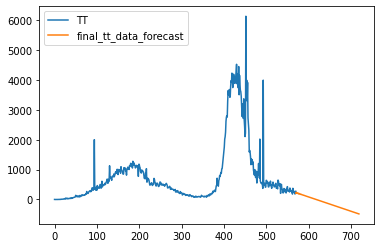

In [146]:
data=data_frame.copy()
future_dates=range(last_index,last_index+150)
future_data=pd.DataFrame(index=future_dates,columns=data.columns)
final_data=pd.concat([data,future_data])
final_data['final_tt_data_forecast']=total_model.predict(start=last_index,end=last_index+150,dynamic=True)
final_data[['TT','final_tt_data_forecast']].plot();

In [147]:
final_data['Date_YMD']=pd.to_datetime(final_data['Date_YMD'])
final_data['Date_YMD'].iloc[571:]=pd.date_range(start='2021-10-06',periods=150,freq='D')

In [149]:
final_total_forecast_data=pd.concat([final_data['TT'].dropna(),final_data['final_tt_data_forecast'].dropna()])

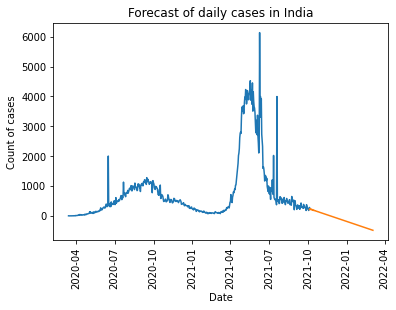

In [150]:
plt.title('Forecast of daily cases in India')
plt.plot(final_data['Date_YMD'],final_data[['TT','final_tt_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');

# Final covid forecast in AP

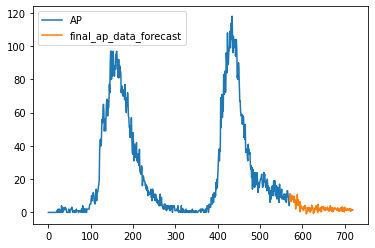

In [139]:
data=data_frame.copy()
future_dates=range(last_index,last_index+150)
future_data=pd.DataFrame(index=future_dates,columns=data.columns)
final_data=pd.concat([data,future_data])
final_data['final_ap_data_forecast']=ap_model.predict(start=last_index,end=last_index+150,dynamic=True)
final_data[['AP','final_ap_data_forecast']].plot();

In [140]:
final_data['Date_YMD']=pd.to_datetime(final_data['Date_YMD'])
final_data['Date_YMD'].iloc[571:]=pd.date_range(start='2021-10-06',periods=150,freq='D')

In [141]:
final_total_forecast_data=pd.concat([final_data['AP'].dropna(),final_data['final_ap_data_forecast'].dropna()])

In [142]:
final_ap_forecast_data

0             0
1             0
2             0
3             0
4             0
         ...   
716    1.333223
717    1.190706
718    1.645336
719    1.591719
720    2.560316
Length: 723, dtype: object

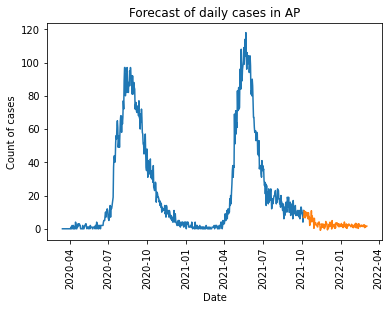

In [145]:
plt.title('Forecast of daily cases in AP')
plt.plot(final_data['Date_YMD'],final_data[['AP','final_ap_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');